In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os

root_dir = "E:\\Repositories\\personal-projects\\ai-ml-projects\\bmi-classification"
os.chdir(root_dir)


In [29]:
class Dataset:
    def __init__(self, data_path, label_encoder=LabelEncoder()):
        self.data_path = data_path
        self.label_encoder = label_encoder
    
    def load_data(self):
        data_frames = []
        for file in os.listdir(self.data_path):
            if file.endswith(".csv"):
                data_buffer = pd.read_csv(os.path.join(self.data_path, file))
                data_frames.append(data_buffer)
        
        if not data_frames:
            print("No CSV files found in the specified directory.")
            return None
        
        # Combine all data frames into a single data frame
        combined_data = pd.concat(data_frames, ignore_index=True)
        combined_data['Gender'] = self.label_encoder.fit_transform(combined_data['Gender'])
        
        return combined_data

data_path = os.path.join(os.getcwd(), 'data', 'raw')
dataset = Dataset(data_path)
data = dataset.load_data()

if data is not None:
    print(data.head())

   Gender  Height  Weight  Index
0       1     174      96      4
1       1     189      87      2
2       0     185     110      4
3       0     195     104      3
4       1     149      61      3


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  900 non-null    int32
 1   Height  900 non-null    int64
 2   Weight  900 non-null    int64
 3   Index   900 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 24.7 KB


In [31]:
data.describe()

,Gender,Height,Weight,Index
count,900.000000,900.000000,900.000000,900.000000
mean,0.494444,170.130000,106.026667,3.743333
std,0.500247,16.456022,32.355564,1.361193
min,0.000000,140.000000,50.000000,0.000000
25%,0.000000,156.000000,80.000000,3.000000
50%,0.000000,171.000000,106.000000,4.000000
75%,1.000000,184.000000,136.000000,5.000000
max,1.000000,199.000000,160.000000,5.000000


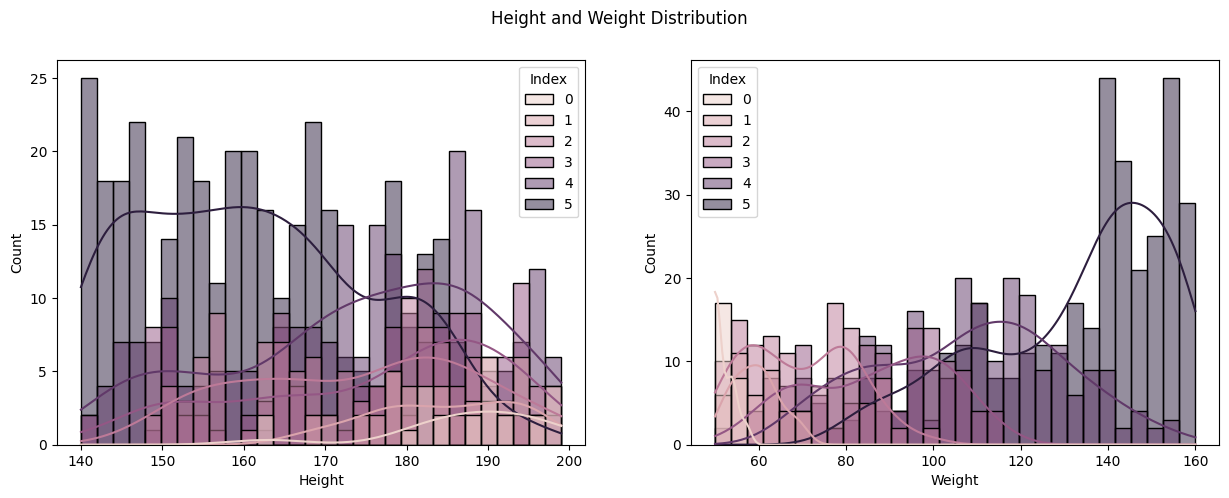

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle("Height and Weight Distribution")
sns.histplot(x = 'Height', bins=30, kde=True, ax=ax[0], hue='Index', data=data, alpha=0.5)
sns.histplot(x = 'Weight', bins=30, kde=True, ax=ax[1], hue='Index', data=data, alpha=0.5)
plt.show()

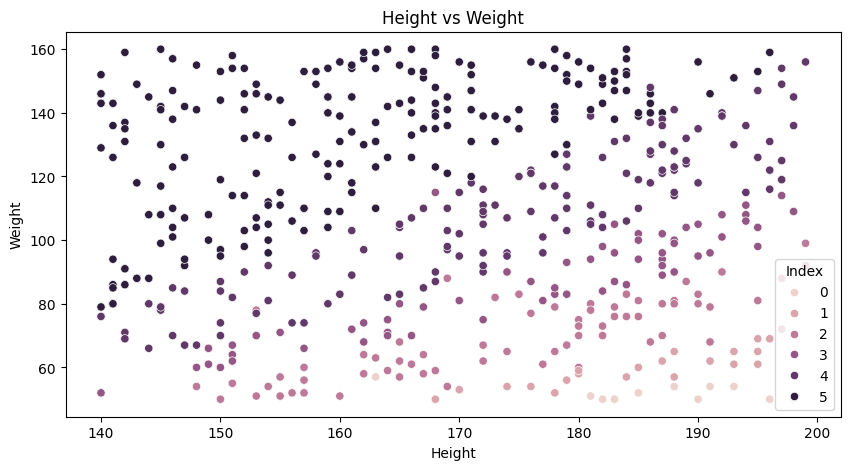

In [33]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Height', y='Weight', data=data, hue='Index')
plt.title("Height vs Weight")
plt.show()

<Axes: >

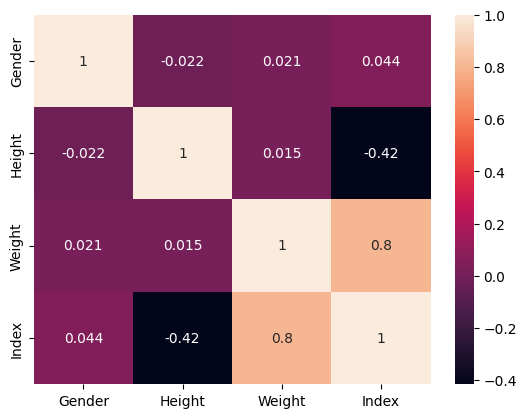

In [34]:
corr = data.corr()
sns.heatmap(corr, annot=True)

In [35]:
data.to_csv(os.path.join(root_dir, 'data', 'processed', 'bmi_data.csv'), index=False)